# Lab 3
Domaine fréquenciel

In [16]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage import data

## Exercice 1
Sous-échantilloné l'image de sorte à conserver 1 pixel sur 8.
> Et pour 1 pixel sur 16?

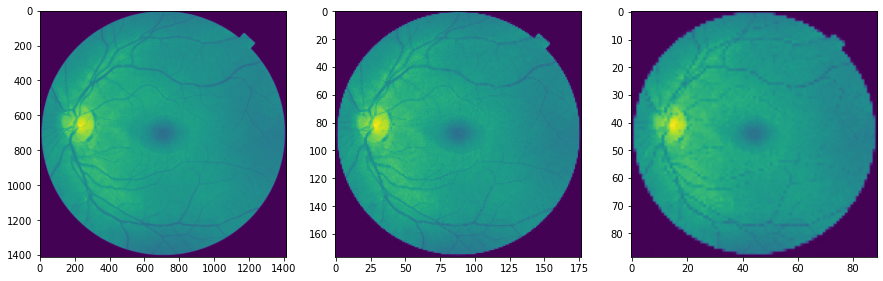

In [17]:
img = data.retina().mean(axis=2)

img8 = img[0::8, 0::8]
img16 = img[0::16, 0::16]

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img8)
plt.subplot(133)
plt.imshow(img16)
plt.show()


[50]


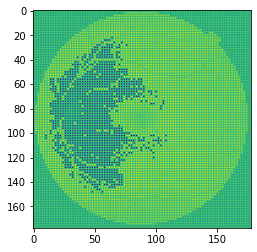

In [27]:
pad_img16 = np.zeros((img16.shape[0] * 2, img16.shape[1] * 2))
print(np.unique(pad_img16))
pad_img16[::2, ::2] = img16

plt.imshow(pad_img16)
plt.show()

## Exercice 2
Appliqué un filtre gaussian sur les images à l'exercices précédent avec un sigma de 1.
> Utilisé la fonction `gaussian_filter`.  

> Pourquoi est-ce qu'un filtre passe-bas comme le filtre gaussian est mauvais avec, par exemple, des lettres.

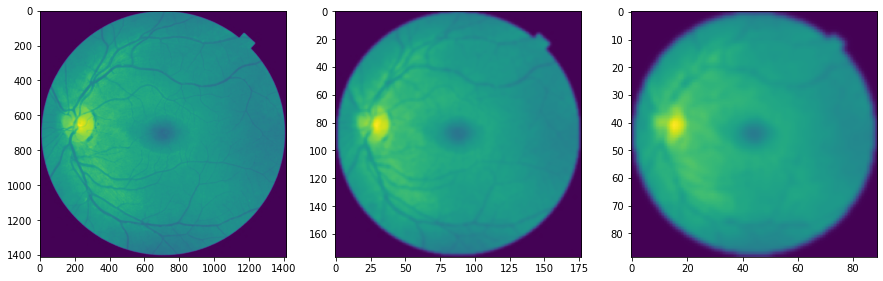

In [19]:
img_gauss = gaussian(img, sigma=1)
img8_gauss = gaussian(img8)
img16_gauss = gaussian(img16)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(img_gauss)
plt.subplot(132)
plt.imshow(img8_gauss)
plt.subplot(133)
plt.imshow(img16_gauss)
plt.show()

## Exercice 3
1. Faite la transformé de Fourier des images suivante et mettez les à nulle (mettre les coins au centre)
2. Faite la transformé de Fourier inverse pour ré-obtenir l'image de base.
> Utilisé les fonctions `np.fft.fft2`, `np.fft.iffshift` et `np.fft.ifft2`

> Comment afficher l'amplitude s'il y a beaucoup de fréquence dans l'image?

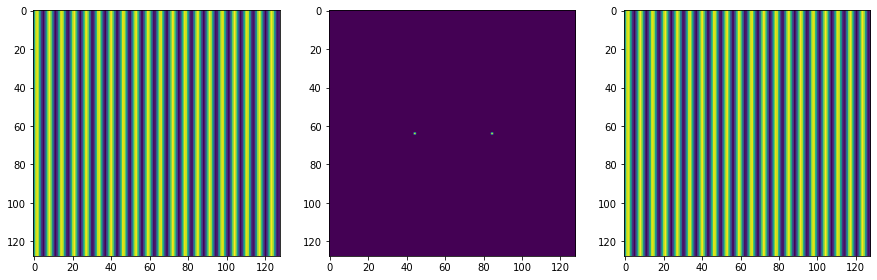

In [54]:
N = 128 # nb pixel
y, x = np.meshgrid(range(N), range(N), indexing="ij")
fx = 2 * np.pi * 20 / N
img = np.sin(x * fx )
img_f = np.fft.fft2(img)
img_fi = np.fft.ifft2(img_f).real

plt.figure(figsize=(15,15))
plt.subplot(131); plt.imshow(img)

plt.subplot(132)
plt.imshow(np.log(np.abs(np.fft.ifftshift(img_f)) + 1e-6))

plt.subplot(133)
plt.imshow(img_fi)
plt.show()

## Observations / exemples

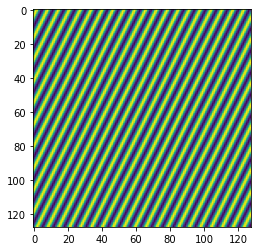

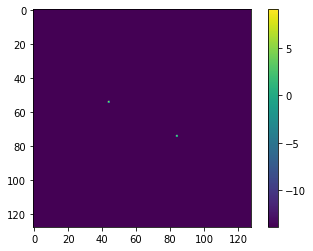

In [21]:
# Exemple onde carrée
N = 128 # nb pixel
y, x = np.meshgrid(range(N), range(N), indexing="ij")
img = np.sin(x * fx + y * fx/2)
#img[img>0] = 1
#img[img<=0] = 0
plt.imshow(img); plt.show()


# TF
img_fft = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft)
plt.imshow(np.log(np.abs(img_fft) + 1e-6)); plt.colorbar()

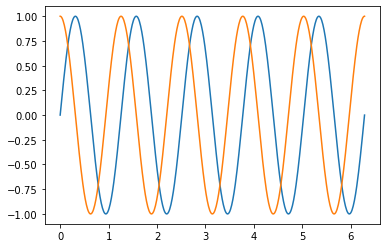

In [22]:
t = np.linspace(0, 2*np.pi, 512)
f = 5
plt.plot(t, np.sin(t * f))
plt.plot(t, np.cos(t * f))
#plt.plot(t, np.sin(t * f + np.pi/2))